In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


In [17]:
# Load the dataset
df = pd.read_csv('data_cardiovascular_risk.csv')

# Display the first few rows
print(df.head())

# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())


   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0 

education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64


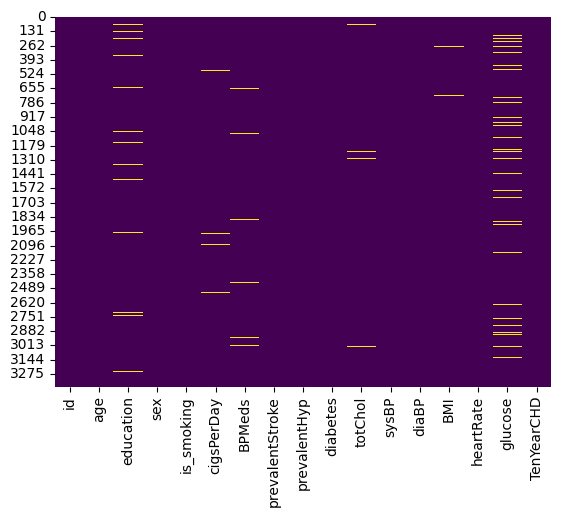

In [18]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [19]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [20]:
# Handle missing values using KNNImputer
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [21]:
# Separate features and target variable
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']


In [22]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable back to the DataFrame
df_scaled['TenYearCHD'] = y


In [23]:
# Define features and target variable
X = df_scaled.drop('TenYearCHD', axis=1)
y = df_scaled['TenYearCHD']


In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Train a Machine Learning Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.87


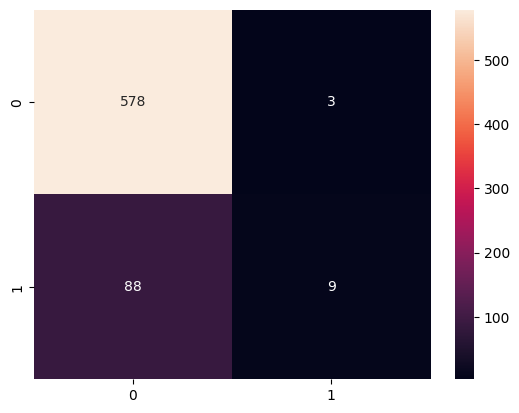

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       581
         1.0       0.75      0.09      0.17        97

    accuracy                           0.87       678
   macro avg       0.81      0.54      0.55       678
weighted avg       0.85      0.87      0.82       678



In [26]:
# Evaluate the Model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, y_pred))


In [27]:
# Save the Model
with open('cvd_model.pkl', 'wb') as file:
    pickle.dump(model, file)
